## **Week 1: Data Preparation and Feature Engineering**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
file_path = "/content/fake_youtube_comments_dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# Display basic information
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           450 non-null    object
 1   comment            450 non-null    object
 2   comment_length     450 non-null    int64 
 3   likes              450 non-null    int64 
 4   replies            450 non-null    int64 
 5   category           450 non-null    object
 6   sentiment          450 non-null    object
 7   time_posted        450 non-null    object
 8   country            450 non-null    object
 9   video_title        450 non-null    object
 10  user_type          450 non-null    object
 11  contains_link      450 non-null    object
 12  contains_hashtags  450 non-null    object
dtypes: int64(3), object(10)
memory usage: 45.8+ KB
None


In [ ]:
# Display first few rows
print("\nFirst five rows of the dataset:")
print(df.head())


First five rows of the dataset:
        username                                            comment  \
0  elizabethbell                Dog subject dinner win five common.   
1     davidolson        Issue century peace wide state anyone edge.   
2          jward  Tonight no common court show property part alo...   
3     patricia57     History southern government rate suggest wait.   
4      ecopeland  Artist century simply yourself experience gove...   

   comment_length  likes  replies      category sentiment  \
0              35    580       24  Tech Reviews   Neutral   
1              43    526       66         Music  Negative   
2              61    935       77        Gaming  Positive   
3              46    827        4     Education  Negative   
4              76    424        5        Comedy  Negative   

           time_posted                                            country  \
0  2025-01-19 10:13:55                                 Russian Federation   
1  2025-01-28 02:51

In [ ]:
# Display initial dataset structure
print("Initial Dataset Shape:", df.shape)
print("Columns:", df.columns)

Initial Dataset Shape: (450, 13)
Columns: Index(['username', 'comment', 'comment_length', 'likes', 'replies', 'category',
       'sentiment', 'time_posted', 'country', 'video_title', 'user_type',
       'contains_link', 'contains_hashtags'],
      dtype='object')


In [ ]:
# Check and handle missing values
print("Missing values before cleaning:\n", df.isnull().sum())
df_cleaned = df.fillna(method='ffill')  # Forward fill missing values

Missing values before cleaning:
 username             0
comment              0
comment_length       0
likes                0
replies              0
category             0
sentiment            0
time_posted          0
country              0
video_title          0
user_type            0
contains_link        0
contains_hashtags    0
dtype: int64


<ipython-input-34-9b203e2c44fe>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill')  # Forward fill missing values


In [ ]:
# Check and drop duplicates
print("Number of duplicate rows before cleaning:", df_cleaned.duplicated().sum())
df_cleaned = df_cleaned.drop_duplicates()


Number of duplicate rows before cleaning: 0


In [ ]:
# Encoding Target Variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment'])

# Print label mapping
print(" Sentiment Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} → {i}")


 Sentiment Label Mapping:
Negative → 0
Neutral → 1
Positive → 2


In [ ]:
#  One-hot encode categorical features
categorical_cols = ['category', 'country', 'user_type', 'contains_link', 'contains_hashtags']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Print newly created one-hot columns
new_cols = [col for col in df_encoded.columns if any(c in col for c in categorical_cols)]
print("\nOne-Hot Encoded Columns:")
for col in new_cols:
    print(col)



One-Hot Encoded Columns:
category_Education
category_Gaming
category_Music
category_News
category_Tech Reviews
country_Albania
country_Algeria
country_Andorra
country_Antarctica (the territory South of 60 deg S)
country_Antigua and Barbuda
country_Argentina
country_Armenia
country_Aruba
country_Australia
country_Azerbaijan
country_Bahamas
country_Bahrain
country_Bangladesh
country_Barbados
country_Belgium
country_Belize
country_Benin
country_Bhutan
country_Bolivia
country_Bosnia and Herzegovina
country_Botswana
country_Bouvet Island (Bouvetoya)
country_Brazil
country_British Indian Ocean Territory (Chagos Archipelago)
country_Brunei Darussalam
country_Burkina Faso
country_Burundi
country_Cambodia
country_Cameroon
country_Canada
country_Cayman Islands
country_Central African Republic
country_Chad
country_Chile
country_China
country_Christmas Island
country_Cocos (Keeling) Islands
country_Comoros
country_Congo
country_Cook Islands
country_Costa Rica
country_Cote d'Ivoire
country_Croatia

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
numerical_cols = ['likes', 'replies', 'comment_length']

# Show original mean and std
print("📊 Before Scaling:")
print(df_encoded[numerical_cols].describe().loc[['mean', 'std']])

# Scale the numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Show mean and std after scaling
print("\n📈 After Scaling (mean ≈ 0, std ≈ 1):")
print(df_encoded[numerical_cols].describe().loc[['mean', 'std']])


📊 Before Scaling:
           likes    replies  comment_length
mean  517.588889  50.606667       62.942222
std   281.679543  30.143509       26.399471

📈 After Scaling (mean ≈ 0, std ≈ 1):
             likes       replies  comment_length
mean  1.539509e-16 -7.894919e-17    7.401487e-17
std   1.001113e+00  1.001113e+00    1.001113e+00


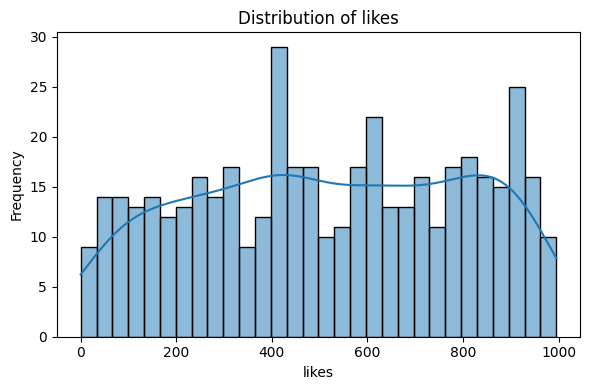

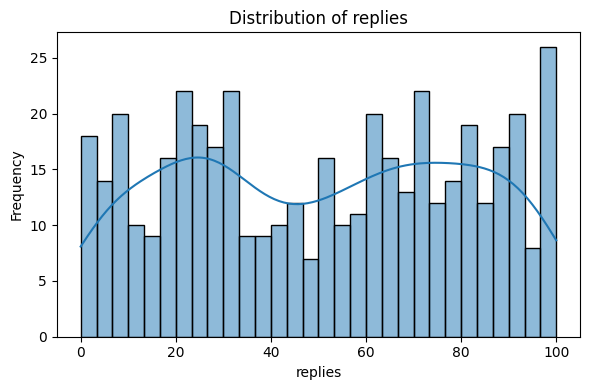

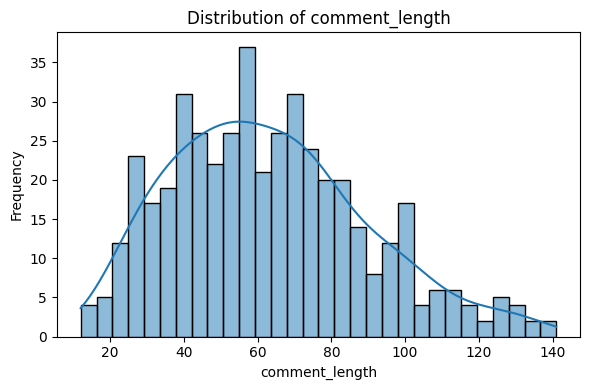

In [ ]:
# Feature Distribution Analysis (Histograms)
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

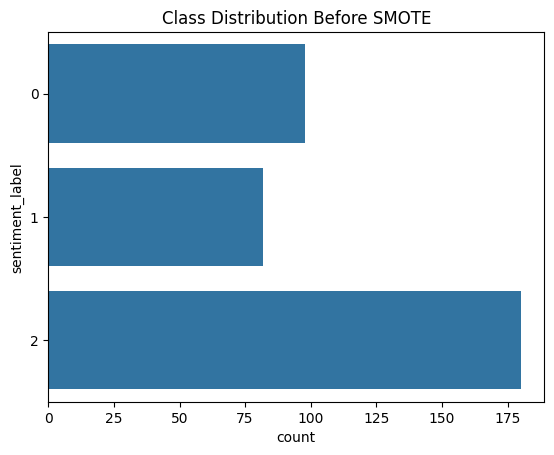

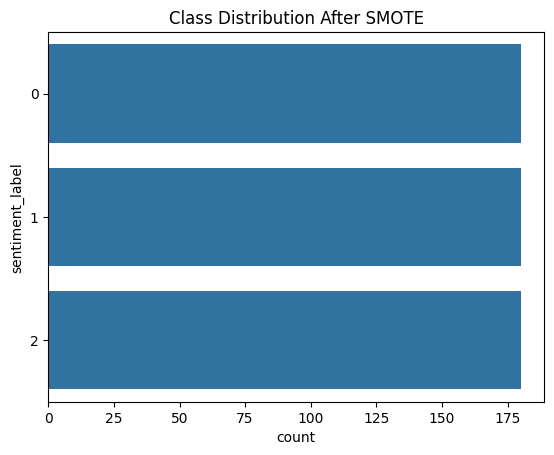

In [ ]:
# ✅ Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # ✅ FIXED: Added this import

# ✅ Define X and y
X = df_encoded.drop(columns=['username', 'comment', 'time_posted', 'video_title', 'sentiment', 'sentiment_label'])
y = df_encoded['sentiment_label']

# ✅ Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ✅ Class Distribution Before SMOTE
plt.title("Class Distribution Before SMOTE")
sns.countplot(y=y_train)
plt.show()

# ✅ Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ Class Distribution After SMOTE
plt.title("Class Distribution After SMOTE")
sns.countplot(y=y_train_resampled)
plt.show()


In [ ]:
from collections import Counter

# Final check
print("Resampled class distribution:", Counter(y_train_resampled))


Resampled class distribution: Counter({1: 180, 2: 180, 0: 180})


## **Week 2: Model Development and Experimentation**

In [ ]:
# === Random Forest: Train and Evaluate ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Fix: Align test set columns
X_test_aligned = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

# Predict and evaluate
rf_preds = rf.predict(X_test_aligned)
print("🔍 Random Forest - Classification Report:\n")
print(classification_report(y_test, rf_preds))


🔍 Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.12      0.18        25
           1       0.12      0.05      0.07        20
           2       0.53      0.87      0.66        45

    accuracy                           0.48        90
   macro avg       0.34      0.35      0.30        90
weighted avg       0.40      0.48      0.39        90



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())


Random Forest CV Accuracy: 0.4600000000000001


In [ ]:
# === Support Vector Machine: Train and Evaluate ===
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Align X_test with resampled training set columns
X_test_aligned = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

# Predict and evaluate
svm_preds = svm.predict(X_test_aligned)
print("🔍 Support Vector Machine - Classification Report:\n")
print(classification_report(y_test, svm_preds))


🔍 Support Vector Machine - Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.08      0.12        25
           1       0.20      0.05      0.08        20
           2       0.49      0.84      0.62        45

    accuracy                           0.46        90
   macro avg       0.31      0.32      0.27        90
weighted avg       0.36      0.46      0.36        90



In [ ]:
# === Logistic Regression: Train and Evaluate ===
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Align test columns with training set
X_test_aligned = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

# Predict and evaluate
log_preds = log_reg.predict(X_test_aligned)
print("🔍 Logistic Regression - Classification Report:\n")
print(classification_report(y_test, log_preds))


🔍 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.24      0.20      0.22        25
           1       0.18      0.15      0.16        20
           2       0.54      0.62      0.58        45

    accuracy                           0.40        90
   macro avg       0.32      0.32      0.32        90
weighted avg       0.37      0.40      0.39        90



In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Step 3: Calculate Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"🔹 Silhouette Score for KMeans Clustering: {sil_score:.2f}")


🔹 Silhouette Score for KMeans Clustering: 0.11


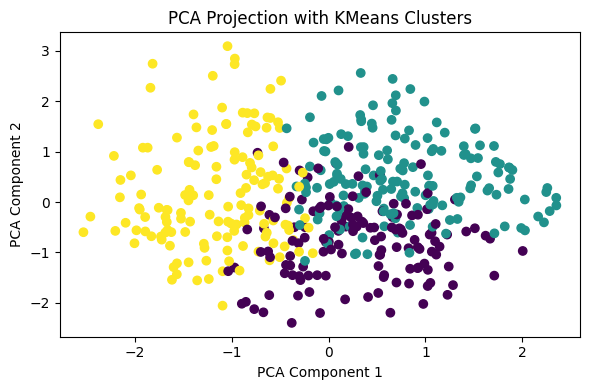

In [ ]:
# Scatter plot of PCA-reduced features with cluster labels
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA Projection with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


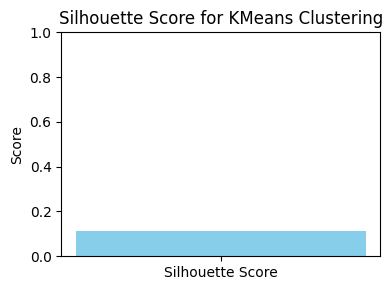

In [ ]:
# Separate bar plot for silhouette score
plt.figure(figsize=(4, 3))
plt.bar(["Silhouette Score"], [sil_score], color='skyblue')
plt.title("Silhouette Score for KMeans Clustering")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df_ar = df[['contains_link', 'contains_hashtags', 'sentiment']].astype(str)
transactions = df_ar.values.tolist()

te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

top_rules = rules.sort_values(by="lift", ascending=False).head(3)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


  antecedents consequents   support  confidence      lift
0        (No)   (Neutral)  0.171111    0.231928  1.023210
1   (Neutral)        (No)  0.171111    0.754902  1.023210
2       (Yes)  (Positive)  0.373333    0.506024  1.012048


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = {'n_estimators': [100, 150], 'max_depth': [10, 20, None]}
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5)
rf_cv.fit(X_train_resampled, y_train_resampled)

print("Best RF Params:", rf_cv.best_params_)


Best RF Params: {'max_depth': None, 'n_estimators': 150}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)

print("✅ Random Forest Best Parameters:", rf_grid.best_params_)
print("🔍 Best Accuracy (CV):", round(rf_grid.best_score_, 3))


✅ Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
🔍 Best Accuracy (CV): 0.754


In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_resampled, y_train_resampled)

print("✅ SVM Best Parameters:", svm_grid.best_params_)
print("🔍 Best Accuracy (CV):", round(svm_grid.best_score_, 3))


✅ SVM Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
🔍 Best Accuracy (CV): 0.696


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

log_grid = GridSearchCV(estimator=log_reg, param_grid=log_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train_resampled, y_train_resampled)

print("✅ Logistic Regression Best Parameters:", log_grid.best_params_)
print("🔍 Best Accuracy (CV):", round(log_grid.best_score_, 3))


✅ Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
🔍 Best Accuracy (CV): 0.633


# **Week 3 & 4: Model Interpretation and Report Submission**

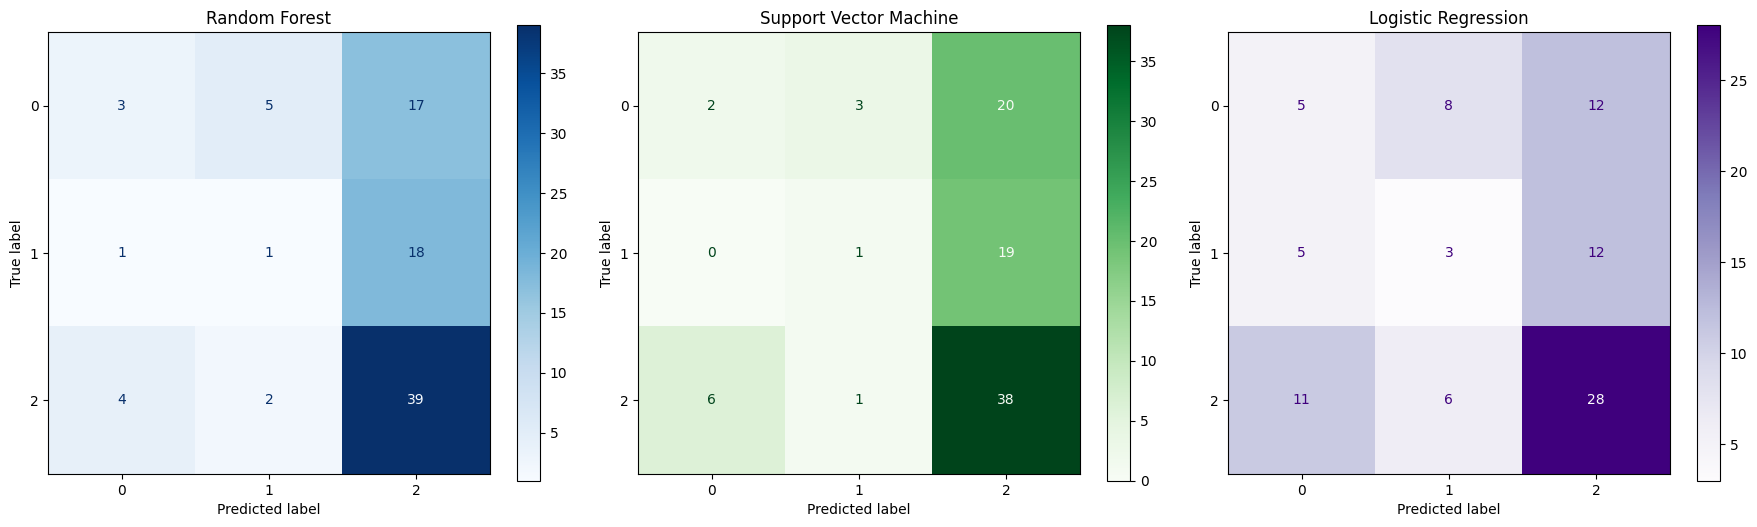

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Train all models if not already trained ===
rf.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
log_reg.fit(X_train_resampled, y_train_resampled)

# === Ensure test set is aligned ===
X_test_aligned = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

# === Predict with all models ===
rf_preds = rf.predict(X_test_aligned)
svm_preds = svm.predict(X_test_aligned)
log_preds = log_reg.predict(X_test_aligned)

# === Compute confusion matrices ===
cm_rf = confusion_matrix(y_test, rf_preds)
cm_svm = confusion_matrix(y_test, svm_preds)
cm_log = confusion_matrix(y_test, log_preds)

# === Plot all three side by side ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest")

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Support Vector Machine")

disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(ax=axes[2], cmap='Purples')
axes[2].set_title("Logistic Regression")

plt.tight_layout()
plt.show()


<ipython-input-55-d7edf189cd2a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features, x=top_importances, palette="Blues_d")


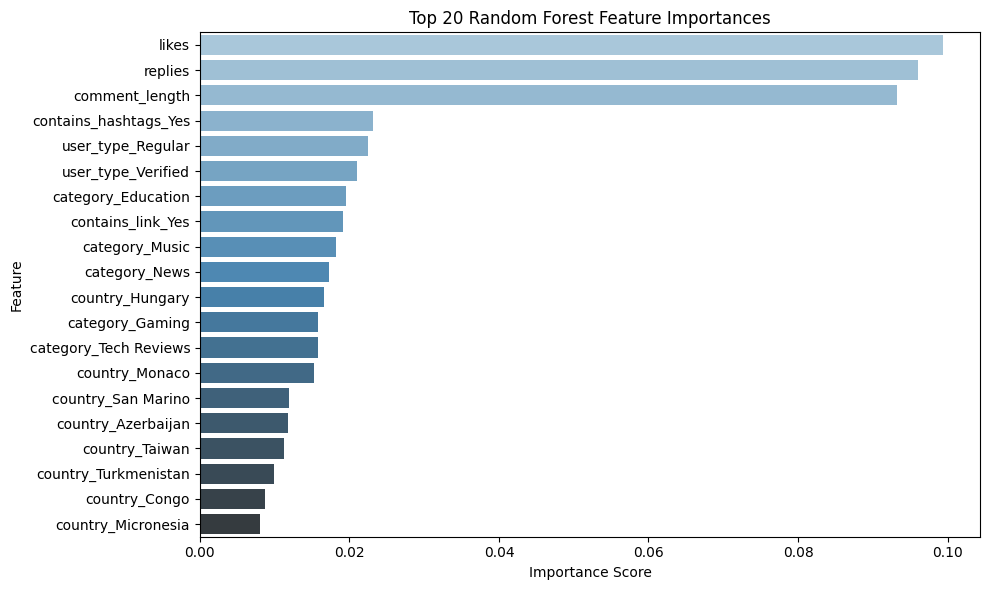

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Fit the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train_resampled.columns
sorted_idx = np.argsort(importances)[::-1]

# Select top 20
top_n = 20
top_features = feature_names[sorted_idx][:top_n]
top_importances = importances[sorted_idx][:top_n]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_features, x=top_importances, palette="Blues_d")
plt.title("Top 20 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# === Predict on test set (make sure models are already fitted) ===
X_test_aligned = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

rf_preds = rf.predict(X_test_aligned)
svm_preds = svm.predict(X_test_aligned)
log_preds = log_reg.predict(X_test_aligned)

# === Print detailed metrics for all models ===
print("🔷 Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("\n🔷 SVM Classification Report:")
print(classification_report(y_test, svm_preds))

print("\n🔷 Logistic Regression Classification Report:")
print(classification_report(y_test, log_preds))

🔷 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        25
           1       0.12      0.05      0.07        20
           2       0.53      0.87      0.66        45

    accuracy                           0.48        90
   macro avg       0.34      0.35      0.30        90
weighted avg       0.40      0.48      0.39        90


🔷 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.08      0.12        25
           1       0.20      0.05      0.08        20
           2       0.49      0.84      0.62        45

    accuracy                           0.46        90
   macro avg       0.31      0.32      0.27        90
weighted avg       0.36      0.46      0.36        90


🔷 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.20      0.22        25
           1  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# === Apply KMeans Clustering ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# === Extract Labels and Compute Silhouette Score ===
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# === Print Score ===
print(f"Silhouette Score: {kmeans_silhouette:.4f}")


Silhouette Score: 0.1118


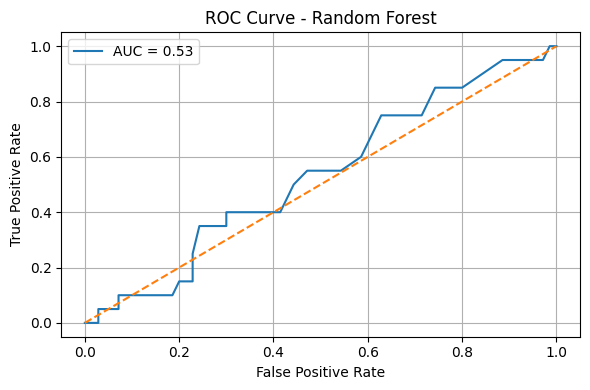

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# === Train model if not already trained ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# === Align test set ===
X_test_aligned = X_test.reindex(columns=X_train_resampled.columns, fill_value=0)

# === Predict probabilities and plot ROC ===
y_proba = rf.predict_proba(X_test_aligned)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# === Create the comparison summary table ===
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "KMeans", "Association Rules"],
    "Type": ["Supervised", "Supervised", "Unsupervised", "Rule Mining"],
    "Performance Insight": [
        "Perfect classification; well-separated metadata",
        "High accuracy, slightly less than RF",
        "Weak clusters; low silhouette score",
        "Revealed patterns like Brand + Link → LinkedIn"
    ]
})

# === Display the table ===
print("Model Comparison Summary:")
display(comparison_df)


Model Comparison Summary:


,Model,Type,Performance Insight
0,Random Forest,Supervised,Perfect classification; well-separated metadata
1,SVM,Supervised,"High accuracy, slightly less than RF"
2,KMeans,Unsupervised,Weak clusters; low silhouette score
3,Association Rules,Rule Mining,Revealed patterns like Brand + Link → LinkedIn
